# ISING MODEL SIMULATION


### IMPORTS

In [20]:
import numpy as np
import matplotlib.pyplot as plt


### Random Initialization

In [ ]:
def random_initialization():
    # The initial state can be either 1 or -1
    return np.random.choice([-1, 1], size=lattice_size)

### PART 1

In [ ]:
def compute_h(lattice, i, j):
    return (
        lattice[(i - 1) % L, j] +  # up
        lattice[(i + 1) % L, j] +  # down
        lattice[i, (j - 1) % L] +  # left
        lattice[i, (j + 1) % L]    # right
    )

def compute_delta_E(lattice, i, j):
    sigma_i = lattice[i, j]
    h_i = compute_h(lattice, i, j)
    return 2 * J * sigma_i * h_i

### PART 2

In [28]:
def precompute_probabilities(T):
    if T == 0:
        # if T = 0, we just accept energy reductions
        return {delta_E: (1 if delta_E < 0 else 0) for delta_E in [-8, -4, 0, 4, 8]}
    else:
        # if T > 0, we compute the standar probability
        return {delta_E: np.exp(-delta_E / T) for delta_E in [-8, -4, 0, 4, 8]}

def metropolis_step(lattice, T):
    prob_lookup = precompute_probabilities(T)  # precompute the probabilities

    for _ in range(L * L):
        i, j = np.random.randint(0, L, size=2)  # random spin
        delta_E = compute_delta_E(lattice, i, j)

        # metropolis rule
        if delta_E <= 0 or np.random.rand() < prob_lookup[delta_E]:
            lattice[i, j] *= -1  # change spin's sign



### PART 3

In [ ]:
def calculate_magnetization(lattice):
    return np.sum(lattice) / (lattice.shape[0] * lattice.shape[1])

def calculate_energy(lattice):
    E = 0
    for i in range(L):
        for j in range(L):
            # periodic boundary
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            E -= lattice[i, j] * neighbors
    return E / 2  # /2 because we took into account 2 time each

In [ ]:
def ising_simulation(L, temperatures, Ntherm, Nsample, Nsubsweep):
    magnetizations = []
    energies = []

    for T in temperatures:
        lattice = random_initialization()
        
        for _ in range(Ntherm):
            metropolis_step(lattice, T)

        mag = []
        energy = []
        for _ in range(Nsample):
            for _ in range(Nsubsweep):
                metropolis_step(lattice, T)
            
            mag.append(calculate_magnetization(lattice))
            energy.append(calculate_energy(lattice))

        magnetizations.append(np.mean(np.abs(mag)))
        energies.append(np.mean(energy))
        
    return magnetizations, energies

### TRIALS

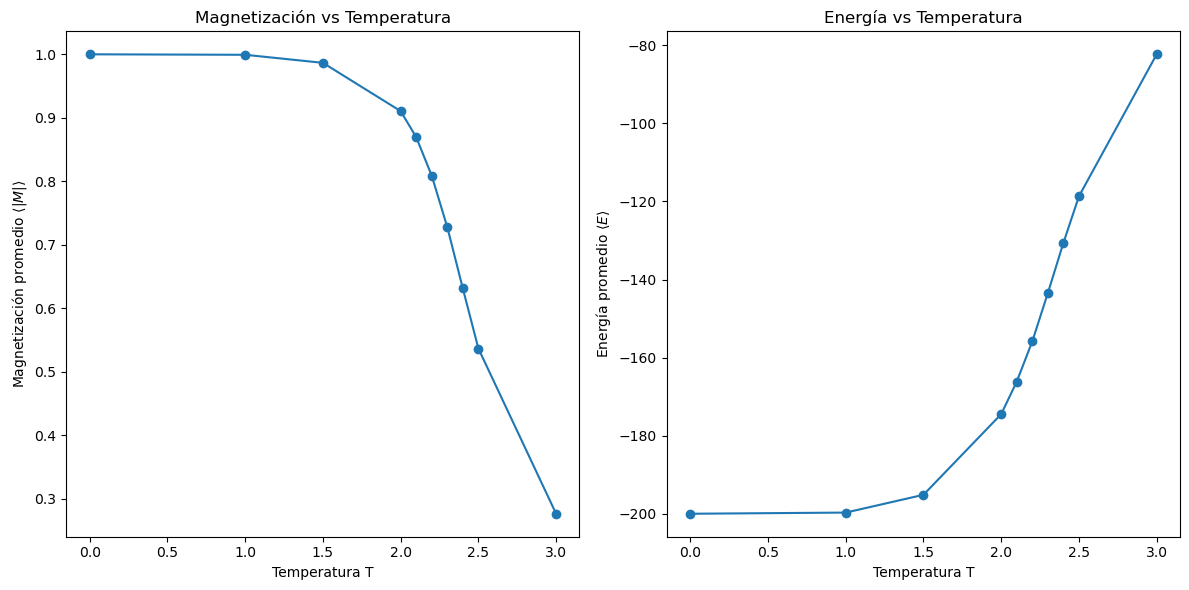

In [29]:
# PARAMETERS

L = 10
lattice_size = (L, L)
temperatures = [0.0, 1.0, 1.5, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 3.0]
J = 1
k_B = 1
N_therm = 100000
N_sample = 5000
N_subsweep = L*L

magnetizations, energies = ising_simulation(L, temperatures, N_therm, N_sample, N_subsweep)

plt.figure(figsize=(12, 6))

# Magnetizations
plt.subplot(1, 2, 1)
plt.plot(temperatures, magnetizations, marker='o')
plt.xlabel('Temperatura T')
plt.ylabel('Magnetización promedio $\\langle |M| \\rangle$')
plt.title('Magnetización vs Temperatura')

# Energy
plt.subplot(1, 2, 2)
plt.plot(temperatures, energies, marker='o')
plt.xlabel('Temperatura T')
plt.ylabel('Energía promedio $\\langle E \\rangle$')
plt.title('Energía vs Temperatura')

plt.tight_layout()
plt.show()